In [109]:
import numpy as np
import sympy as sp
import itertools
import matplotlib.pyplot as plt

class ConstraintPlotter:
    def __init__(self, objective_function, constraints, x_range=(-5, 5), y_range=(-5, 5), resolution=100):
        """
        Initializes the plotter with an objective function and constraints.
        
        Parameters:
        - objective_function: A sympy expression for the function to minimize/maximize.
        - constraints: A list of sympy expressions representing boundary constraints.
        - x_range, y_range: Tuple defining the plot range for x and y.
        """
        self.x1, self.x2 = sp.symbols("x_1, x_2")
        self.objective_function = objective_function
        self.constraints = constraints
        self.x_range = x_range
        self.y_range = y_range
        self.resolution = resolution
    
    def plot(self, name, opt):
        """Plots the function contours and constraint boundaries."""
        z_func = sp.lambdify((self.x1, self.x2), self.objective_function, "numpy")

        x_vals = np.linspace(*self.x_range, self.resolution)
        y_vals = np.linspace(*self.y_range, self.resolution)
        X, Y = np.meshgrid(x_vals, y_vals)
        Z = z_func(X, Y)
        
        plt.figure(figsize=(8, 6))
        contour = plt.contourf(X, Y, Z, levels=self.resolution, cmap="coolwarm")
        plt.colorbar(contour, label="Objective Function Value (z)")

        colors = itertools.cycle(["red", "blue", "green", "purple", "orange", "brown", "cyan", "magenta"])

        for constraint in self.constraints:
            lhs, rhs = constraint.lhs, constraint.rhs
            color = next(colors)
            
            if self.x1 not in constraint.free_symbols:  
                x_const = float(rhs)
                plt.axvline(x_const, label=str(constraint), linewidth=2.5, c=color)
                continue

            if self.x2 not in constraint.free_symbols:  
                y_const = float(rhs)
                plt.axhline(y_const, label=str(constraint), linewidth=2.5, c=color)
                continue

            eq = sp.Eq(lhs-rhs, 0)
            y_expr = sp.solve(eq, self.x2)
            if y_expr:
                y_func = sp.lambdify(self.x1, y_expr[0], "numpy")
                plt.plot(x_vals, y_func(x_vals), label=str(constraint), linewidth=2.5, c=color)

        plt.plot(opt[0], opt[1], marker="o", color="black", markersize=10)
        plt.text(opt[0] + 0.1, opt[1] + 0.1, f"({opt[0]:.2f}, {opt[1]:.2f}, {z_func(opt[0], opt[1]):.2f})", fontsize=12)

        plt.xlabel(r"$x_1$")
        plt.ylabel(r"$x_2$")
        plt.title("Objective Function Contour with Constraints")
        plt.legend()
        plt.grid()
        plt.savefig(f"{name}.png")
        plt.show()


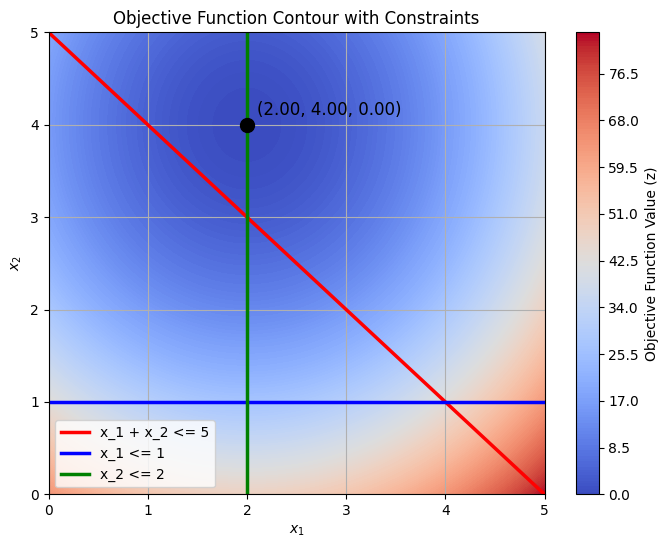

In [110]:
x1, x2 = sp.symbols("x_1 x_2")

objective_function = 4 * (x1 - 2) ** 2 + 3 * (x2 - 4) ** 2

constraints = [
    x1 + x2 <= 5,
    x1 <= 1,
    x2 <= 2
]

plotter = ConstraintPlotter(objective_function, constraints, x_range=(0, 5), y_range=(0, 5), resolution=200)
plotter.plot(name="pics/q1", opt=[2, 4])


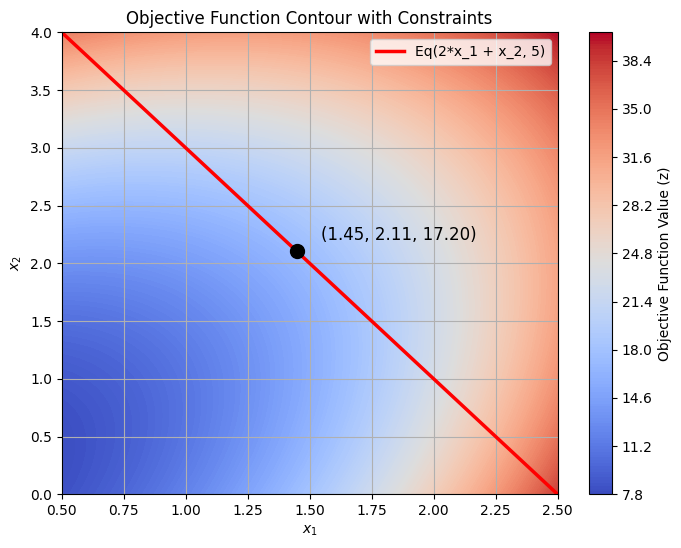

In [111]:
x1, x2 = sp.symbols("x_1 x_2")

objective_function = 5*x1**2 - 3*x1*x2 + 2*x2**2 + 7

constraints = [sp.Eq(2*x1 + x2, 5)]

plotter = ConstraintPlotter(objective_function, constraints, x_range=(0.5, 2.5), y_range=(0, 4), resolution=200)
plotter.plot(name="pics/q2", opt=[55/38, 40/19])

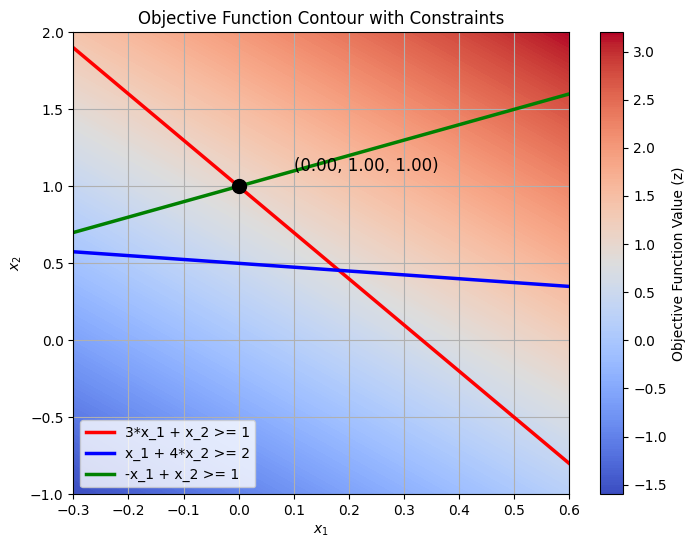

In [112]:
x1, x2 = sp.symbols("x_1 x_2")

objective_function = 2*x1+x2

constraints = [3*x1 + x2 >= 1,
               x1+4*x2 >= 2,
               -x1 + x2 >= 1]

plotter = ConstraintPlotter(objective_function, constraints, x_range=(-0.3, 0.6), y_range=(-1, 2), resolution=200)
plotter.plot(name="pics/q3", opt=[0, 1])